 The best solution found:                                                                           
 [10.  1.  2.]

 Objective function:
 0.9444444444444445


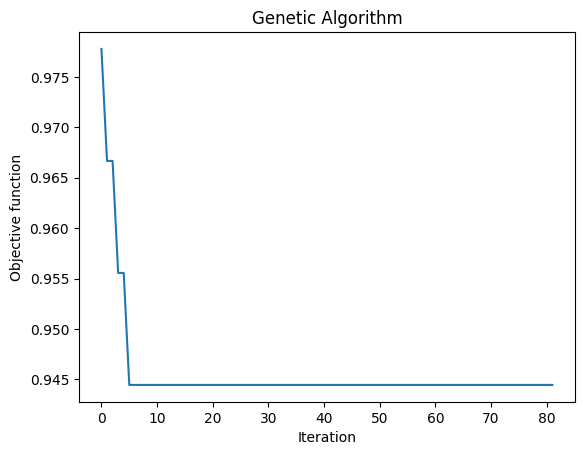

Оптимальные значения параметров:
Затраченное время: 75.78258800506592 сек
SVM C: 10.0
KNN n_neighbors: 1.0
RF n_estimators: 2.0


"\nsvm_values = model.report[1]\nknn_values = model.report[2]\nrf_values = model.report[3]\n\n\nsvm_values = np.array(svm_values)\niterations = np.arange(1, svm_values.size + 1)\nprint(svm_values)\nplt.plot(svm_values, iterations,  label='SVM')\nplt.xlabel('Количество итераций')\nplt.ylabel('Точность моделей')\nplt.show()\n"

In [17]:
from matplotlib import pyplot as plt
import time

import numpy as np
from sklearn import datasets, svm, neighbors, ensemble
from sklearn.model_selection import train_test_split
from geneticalgorithm import geneticalgorithm as ga


data = datasets.load_iris()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Функция для оптимизации (оценка точности модели)
def fitness_function(params):
    
    svm_C, knn_n_neighbors, rf_n_estimators = params

   
    svm_model = svm.SVC(C=svm_C)
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=int(knn_n_neighbors))
    rf_model = ensemble.RandomForestClassifier(n_estimators=int(rf_n_estimators))

    
    svm_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Оценка точности моделей на тестовой выборке
    svm_accuracy = svm_model.score(X_test, y_test)
    knn_accuracy = knn_model.score(X_test, y_test)
    rf_accuracy = rf_model.score(X_test, y_test)

    # Вернуть среднюю точность
    return np.mean([svm_accuracy, knn_accuracy, rf_accuracy])



varbound = np.array([[1,10]]*3)

# экземпляра генетического алгоритма
model = ga(function=fitness_function, dimension=3, variable_type='int', variable_boundaries=varbound)

start = time.time()
model.run()
elapsed_time = time.time() - start

# Вывод результатов
print("Оптимальные значения параметров:")
print("Затраченное время: {} сек".format(elapsed_time))
print("SVM C:", model.best_variable[0])
print("KNN n_neighbors:", model.best_variable[1])
print("RF n_estimators:", model.best_variable[2])



'''
svm_values = model.report[1]
knn_values = model.report[2]
rf_values = model.report[3]


svm_values = np.array(svm_values)
iterations = np.arange(1, svm_values.size + 1)
print(svm_values)
plt.plot(svm_values, iterations,  label='SVM')
plt.xlabel('Количество итераций')
plt.ylabel('Точность моделей')
plt.show()
'''
